Predicting the closing stock price of a Apple Inc. using the past 20 day stock price by an artificial recurrent neural network called LSTM.

In [1]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Get the stock Historical Data
historical_data = pd.read_csv('HistoricalData_APPLE.csv', parse_dates = ['Date'])
historical_data

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
1,2021-06-08,$126.74,74403770,$126.60,$128.46,$126.21
2,2021-06-07,$125.90,71057550,$126.17,$126.32,$124.83
3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
...,...,...,...,...,...,...
2511,2011-06-16,$11.61,507299317,$11.68,$11.74,$11.37
2512,2011-06-15,$11.67,395841722,$11.78,$11.80,$11.60
2513,2011-06-14,$11.87,333995906,$11.79,$11.90,$11.76
2514,2011-06-13,$11.66,329376468,$11.69,$11.73,$11.61


In [3]:
historical_data.sort_values('Date', inplace=True)

In [4]:
historical_data.reset_index()

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,2011-06-10,$11.64,433801306,$11.81,$11.85,$11.63
1,2514,2011-06-13,$11.66,329376468,$11.69,$11.73,$11.61
2,2513,2011-06-14,$11.87,333995906,$11.79,$11.90,$11.76
3,2512,2011-06-15,$11.67,395841722,$11.78,$11.80,$11.60
4,2511,2011-06-16,$11.61,507299317,$11.68,$11.74,$11.37
...,...,...,...,...,...,...,...
2511,4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
2512,3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2513,2,2021-06-07,$125.90,71057550,$126.17,$126.32,$124.83
2514,1,2021-06-08,$126.74,74403770,$126.60,$128.46,$126.21


In [5]:
historical_data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [6]:
historical_data["Close/Last"] = historical_data["Close/Last"].str.replace('$', '').astype(float)
historical_data["Open"] = historical_data["Open"].str.replace('$', '').astype(float)
historical_data["High"] = historical_data["High"].str.replace('$', '').astype(float)
historical_data["Low"] = historical_data["Low"].str.replace('$', '').astype(float)

In [7]:
historical_data.head()

,Date,Close/Last,Volume,Open,High,Low
2515,2011-06-10,11.64,433801306,11.81,11.85,11.63
2514,2011-06-13,11.66,329376468,11.69,11.73,11.61
2513,2011-06-14,11.87,333995906,11.79,11.90,11.76
2512,2011-06-15,11.67,395841722,11.78,11.80,11.60
2511,2011-06-16,11.61,507299317,11.68,11.74,11.37


In [8]:
historical_data.set_index("Date", inplace = True)
historical_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2011-06-10,11.64,433801306,11.81,11.85,11.63
2011-06-13,11.66,329376468,11.69,11.73,11.61
2011-06-14,11.87,333995906,11.79,11.90,11.76
2011-06-15,11.67,395841722,11.78,11.80,11.60
2011-06-16,11.61,507299317,11.68,11.74,11.37


In [9]:
# Get the number of rows and columns in the data set
historical_data.shape

(2516, 5)

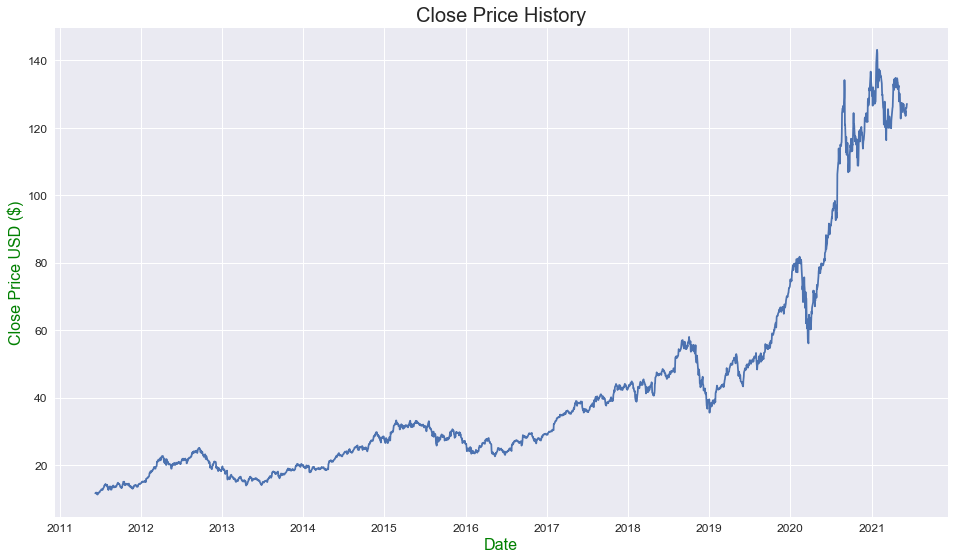

In [10]:
# Visualizing the closing price history
plt.figure(figsize=(16,9))
plt.title('Close Price History', fontsize = 20)
plt.plot(historical_data['Close/Last'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [11]:
# Create a new dataframe with only the 'Close' column
data = historical_data.filter(['Close/Last'])

In [12]:
# Convert the dataframe to a numpy array
dataset = data.values

In [13]:
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)*.8)
training_data_len

2013

In [14]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00288097],
       [0.0030326 ],
       [0.00462472],
       ...,
       [0.86914329],
       [0.87551175],
       [0.87846854]])

In [15]:
# Create the training data set
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([0.00288097, 0.0030326 , 0.00462472, 0.00310842, 0.00265353,
       0.00136467, 0.        , 0.00272934, 0.00197119, 0.00432146,
       0.0030326 , 0.0045489 , 0.00538287, 0.00507961, 0.0055345 ,
       0.0075815 , 0.00924943, 0.00985595, 0.01137225, 0.01205459])]
[0.010462471569370746]



In [16]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1993, 20, 1)

In [18]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model
model.fit(x_train, y_train, batch_size = 16, epochs = 100, verbose=1)

Epoch 1/100
125/125 [==============================] - 40s 25ms/step - loss: 0.0030 0s - loss: 0.003
Epoch 2/100
125/125 [==============================] - 3s 26ms/step - loss: 7.6342e-05
Epoch 3/100
125/125 [==============================] - 3s 25ms/step - loss: 7.6366e-05
Epoch 4/100
125/125 [==============================] - 3s 27ms/step - loss: 7.4070e-05
Epoch 5/100
125/125 [==============================] - 4s 31ms/step - loss: 6.5518e-05
Epoch 6/100
125/125 [==============================] - 3s 27ms/step - loss: 5.6732e-05
Epoch 7/100
125/125 [==============================] - 3s 25ms/step - loss: 5.0815e-05
Epoch 8/100
125/125 [==============================] - 3s 25ms/step - loss: 5.5652e-05
Epoch 9/100
125/125 [==============================] - 3s 26ms/step - loss: 8.1769e-05
Epoch 10/100
125/125 [==============================] - 3s 25ms/step - loss: 4.5739e-05
Epoch 11/100
125/125 [==============================] - 3s 25ms/step - loss: 4.6434e-05: 0s
Epoch 12/100
125/125 [=

125/125 [==============================] - 2s 16ms/step - loss: 1.6194e-05
Epoch 93/100
125/125 [==============================] - 2s 16ms/step - loss: 1.9139e-05
Epoch 94/100
125/125 [==============================] - 2s 16ms/step - loss: 1.7973e-05
Epoch 95/100
125/125 [==============================] - 2s 16ms/step - loss: 2.4241e-05: 0s - loss: 2.482
Epoch 96/100
125/125 [==============================] - 2s 16ms/step - loss: 1.8704e-05
Epoch 97/100
125/125 [==============================] - 2s 16ms/step - loss: 1.6614e-05
Epoch 98/100
125/125 [==============================] - 2s 16ms/step - loss: 1.8866e-05
Epoch 99/100
125/125 [==============================] - 2s 16ms/step - loss: 2.3899e-05
Epoch 100/100
125/125 [==============================] - 2s 16ms/step - loss: 2.2889e-05


In [21]:
# Create the testing data set
test_data = scaled_data[training_data_len - past_days: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, 0])

In [22]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [23]:
# Reshape the data
x_test = np.reshape(x_test, (x_test. shape[0], x_test. shape[1], 1))

In [24]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [25]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1251192248365274

C:\Users\Abhi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


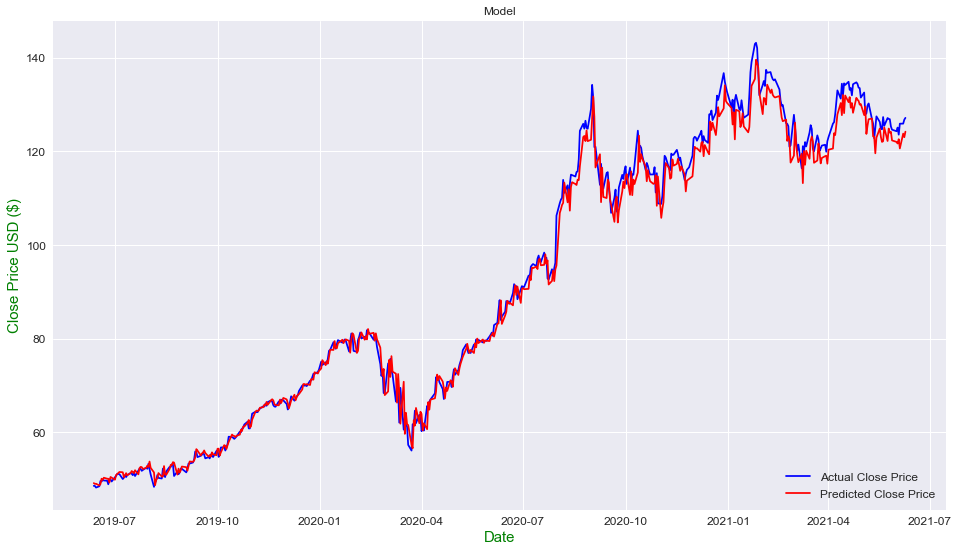

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel( 'Close Price USD ($)', fontsize = 15, color = 'g')
plt.plot(valid['Close/Last'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend (loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [27]:
# Show the valid and Predicted Prices
valid

,Close/Last,Predictions
Date,,
2019-06-12,48.55,49.140961
2019-06-13,48.54,48.972805
2019-06-14,48.19,49.004883
2019-06-17,48.47,48.634304
2019-06-18,49.61,48.946842
...,...,...
2021-06-03,123.54,122.584282
2021-06-04,125.89,120.601143
2021-06-07,125.90,123.768745


### Predicting Close price for next day after the Historical data ends

In [28]:
# Getting next day from where the Historical Dataset ends
import datetime

last_day = historical_data.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-10 00:00:00


In [29]:
# Create a new dataframe
new_df = historical_data.filter(['Close/Last'])
# Get the last 20 day closing price values and convert the dataframe to an array
last_20_days = new_df[-20: ].values
# Scale the data to be values between 0 and 1
last_20_days_scaled = scaler.transform(last_20_days)
# Create an empty list
X_test = []
# Append the past 20 days
X_test.append(last_20_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-06-10 00:00:00  =  [[124.377304]]
